# 🌸 Principal Component Analysis (PCA) with the Iris Dataset  

## Table of Contents
1. Introduction
2. Why PCA Matters
3. Mathematical Intuition
4. How PCA Works (Step by Step)
5. Step 1 – Load the Iris Dataset
6. Step 2 – Apply PCA
7. Step 3 – Explained Variance
8. Step 4 – Visualize PCA Results
9. Step 5 – 3D PCA Visualization (Bonus)
10. Limitations of PCA
11. Key Takeaways & Next Steps

---

## Introduction  

Imagine you have a large music playlist 🎶 with hundreds of songs. Each song has many attributes: tempo, loudness, genre, popularity, duration, and energy level.  

If you wanted to organize your playlist or understand the main styles without diving into every single attribute, how would you do it?  

👉 **Principal Component Analysis (PCA)** helps by identifying the main "themes" (directions of maximum variation) in your dataset. These new features, called **principal components**, allow us to:  
- Reduce complexity  
- Keep most of the original information  
- Visualize high-dimensional data  

---

## Why PCA Matters  

- 📊 Simplifies complex data → easier to explore and visualize  
- ⚡ Removes redundancy → helps models train faster  
- 🔑 Foundational tool in ML, image processing, finance, biology  

---

## Mathematical Intuition  

At its core, PCA solves the **eigenvalue problem** for the covariance matrix:  

$$
\Sigma v = \lambda v
$$

- $v$: eigenvector → direction of maximum variance (**principal component**)  
- $\lambda$: eigenvalue → how much variance that direction explains  
- Larger $\lambda$ → more variance explained

The components are ordered by variance explained:  
- **PC1** = captures the most variance  
- **PC2** = second most, orthogonal to PC1  
- … and so on  

---

## How PCA Works (Step by Step)

PCA may sound abstract, but the process is systematic. Here’s the flow:

1. **📊 Original Data (High-D features)**  
   - Start with your dataset $X$ with many correlated variables.  
   - Example: sepal length, sepal width, petal length, petal width in Iris. 

2. **⚖️ Standardize the Data**  
   - Ensure each feature has mean $0$ and standard deviation $1$.  
   - How:  
     $$ 
     X_{\text{standardized}} = \frac{X - \mu_X}{\sigma_X}
      $$
     where $\mu_X$ is the mean of each feature and $\sigma_X$ is the standard deviation.  
   - This prevents features with larger scales (e.g., “petal length in cm” vs. “sepal width in cm”) from dominating the analysis.

3. **📐 Covariance Matrix**  
   - Measures how features vary together.  
   - How:  
     $$
     \Sigma = \frac{1}{n-1} X_{\text{standardized}}^\top X_{\text{standardized}}
     $$ 
   - Example: if tempo and energy are strongly correlated, their covariance will be high.  

4. **🔑 Eigenvalues & Eigenvectors**  
   - **How:** Solve the equation  
     $$
     \Sigma v = \lambda v
     $$  
     where $v$ is an eigenvector (principal direction) and $\lambda$ is its eigenvalue (variance captured).  
   - Each eigenvalue $\lambda_i$ indicates the amount of variance its eigenvector captures.  
   - **Explained Variance Ratio:**  
     $$
     \text{Explained Variance Ratio}_i = \frac{\lambda_i}{\sum_j \lambda_j}
     $$  
     This ratio shows the proportion of total variance preserved by component $i$.  

5. **📊 Choosing the Top $k$ Components**  
   - Compute cumulative explained variance:  
     $$
     \sum_{i=1}^k \frac{\lambda_i}{\sum_j \lambda_j} \geq \text{threshold (e.g., 0.95)}
     $$  
   - **Intuition:** Keep enough components to capture most of the variance while discarding the rest to reduce dimensionality and noise.  

6. **📉 Projection onto Principal Components**  
   - **How:** Project the standardized data onto the top $k$ eigenvectors:  
     $$
     Z = X_{\text{standardized}} \cdot V_k
     $$ 
     where $V_k$ contains the first $k$ eigenvectors (principal components).  
   - **Intuition:** This gives a lower-dimensional dataset ($Z$) that retains most of the original information.  
👉 In practice, libraries like **scikit-learn** handle these steps under the hood, but it’s valuable to know what’s happening behind the scenes.

---

## Step 1 – Load the Iris Dataset  

In [26]:
from sklearn.datasets import load_iris
import pandas as pd

In [27]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [28]:
# Put into a DataFrame for easier inspection
df = pd.DataFrame(X, columns=feature_names)
df["species"] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Step 2 – Standardize the data

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

## Step 3 – Apply PCA

In [30]:
from sklearn.decomposition import PCA

# Reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("Transformed shape:", X_pca.shape)

Original shape: (150, 4)
Transformed shape: (150, 2)


In [31]:
# Show first 5 rows of transformed data
pd.DataFrame(X_pca, columns=["PC1", "PC2"]).head()

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


## Step 4 – Explained Variance

In [32]:
import matplotlib.pyplot as plt

explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

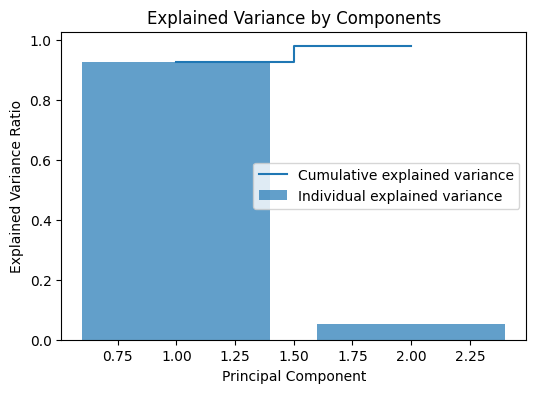

PC1 explains 92.46% of the variance
PC2 explains 5.31% of the variance
Together: 97.77%


In [33]:
# Explained variance ratio plot
plt.figure(figsize=(6,4))
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.7, label="Individual explained variance")
plt.step(range(1, len(explained_var)+1), cumulative_var, where="mid", label="Cumulative explained variance")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Components")
plt.legend(loc="best")
plt.show()

print(f"PC1 explains {explained_var[0]*100:.2f}% of the variance")
print(f"PC2 explains {explained_var[1]*100:.2f}% of the variance")
print(f"Together: {cumulative_var[1]*100:.2f}%")

## Step 4 – Visualize PCA Results

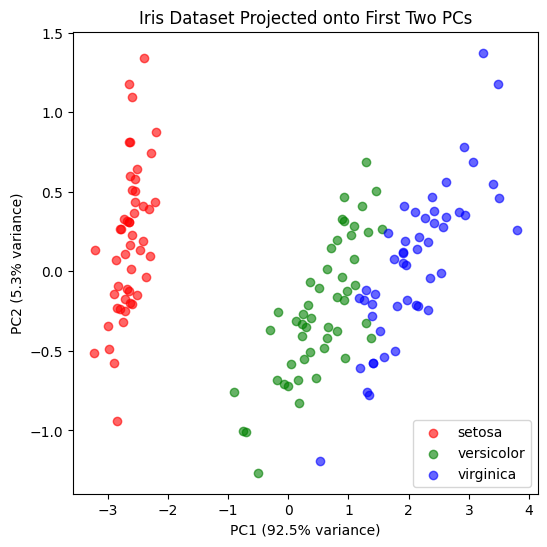

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
for target, color, label in zip([0,1,2], ["red","green","blue"], target_names):
    plt.scatter(X_pca[y==target, 0], X_pca[y==target, 1], c=color, label=label, alpha=0.6)

plt.xlabel(f"PC1 ({explained_var[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({explained_var[1]*100:.1f}% variance)")
plt.title("Iris Dataset Projected onto First Two PCs")
plt.legend()
plt.show()

## Step 5 – 3D PCA Visualization

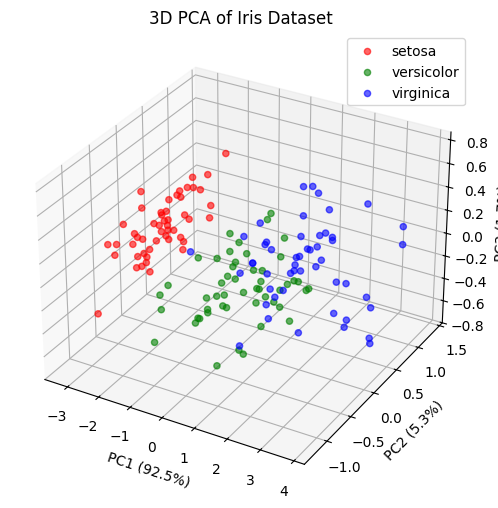

In [35]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)
explained_var_3d = pca_3d.explained_variance_ratio_

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")

for target, color, label in zip([0,1,2], ["red","green","blue"], target_names):
    ax.scatter(X_pca_3d[y==target,0], X_pca_3d[y==target,1], X_pca_3d[y==target,2], 
               c=color, label=label, alpha=0.6)

ax.set_xlabel(f"PC1 ({explained_var_3d[0]*100:.1f}%)")
ax.set_ylabel(f"PC2 ({explained_var_3d[1]*100:.1f}%)")
ax.set_zlabel(f"PC3 ({explained_var_3d[2]*100:.1f}%)")
ax.set_title("3D PCA of Iris Dataset")
ax.legend()
plt.show()

## Limitations of PCA  

- Assumes **linear relationships** → struggles with nonlinear data  
- Sensitive to **scaling** (standardization often required)  
- Harder to interpret components (they’re linear combinations of features)  
- PCA captures **variance**, not necessarily what’s “important” for classification  

---

## Key Takeaways 

✅ PCA reduces dimensionality while keeping as much variance as possible  
✅ In the Iris dataset, 2 components explain ~97% of the variance  
✅ Great for visualization and preprocessing before ML models  
